
# Optimal Transport between 2D empirical distributions

Illustration of 2D optimal transport between distributions that are weighted
sum of Diracs. The OT matrix is plotted with the samples.


In [1]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#         Kilian Fatras <kilian.fatras@irisa.fr>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 4

import numpy as np
import torch
import matplotlib.pylab as pl
import ot
import ot.plot

## Generate data



In [2]:
n = 16  # nb samples

xs = torch.randn(n, 2)
xt = torch.randn(n, 2)

a, b = torch.ones((n,)) / n, torch.ones((n,)) / n  # uniform distribution on samples

In [3]:
# loss matrix
M = ot.dist(xs, xt)

## Plot data



Text(0.5, 1.0, 'Cost matrix M')

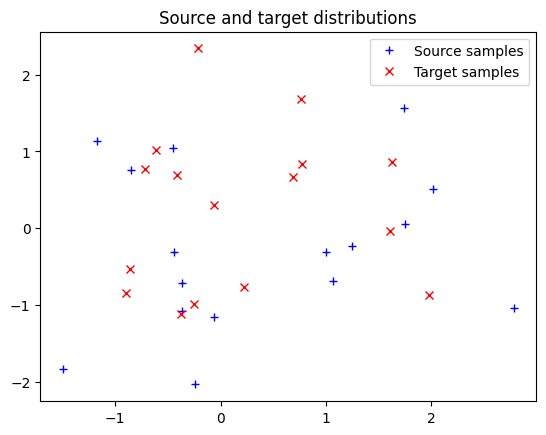

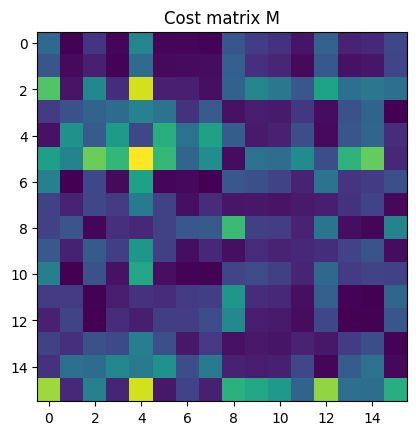

In [4]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

## Compute EMD



Text(0.5, 1.0, 'OT matrix with samples')

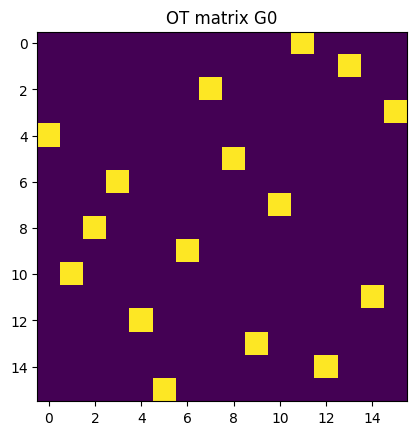

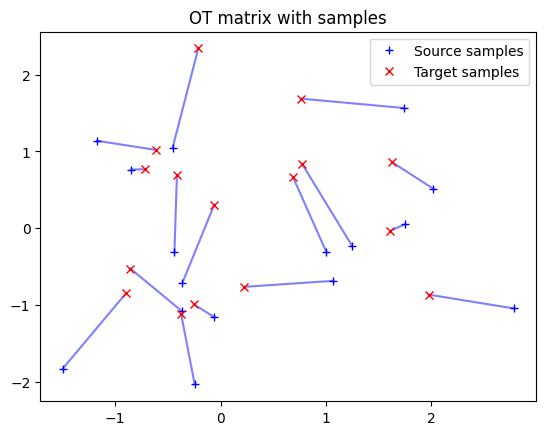

In [5]:
G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0.numpy(), c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')

In [6]:
# print((G0*n).to(dtype=torch.bool))
bool_g = (G0*n).to(dtype=torch.bool)
print((G0*n).to(dtype=torch.int))

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)


Text(0.5, 1.0, 'OT matrix with samples, sorted')

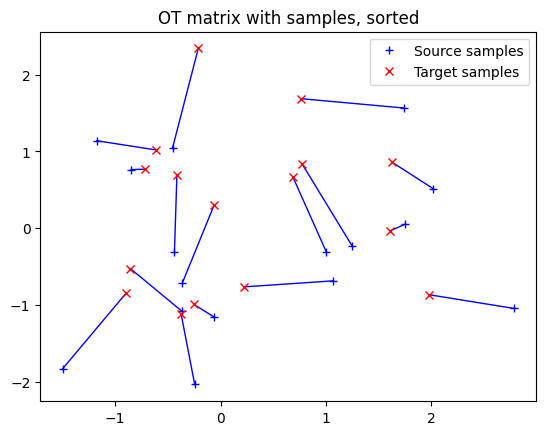

In [7]:
sorted_xs = torch.zeros_like(xs)
sorted_xt = torch.zeros_like(xt)
for i in range(n):
        for j in range(n):
            if bool_g[i, j]:
                sorted_xs[i] = xs[i]
                sorted_xt[i] = xt[j]

pl.figure(5)
for i in range(sorted_xs.shape[0]):
    pl.plot([sorted_xs[i, 0], sorted_xt[i, 0]], [sorted_xs[i, 1], sorted_xt[i, 1]], color='b', linestyle='-', linewidth=1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples, sorted')